<a href="https://colab.research.google.com/github/MahmoudOsama9/Blocked-Countries-API/blob/master/Zomato%20Bangalore%20Restaurant%20Analysis%20%26%20Rating%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSV**

The purpose of this dataset is to analyze and understand the restaurant industry in Bangalore, with a focus on:
- Customer preferences: What types of restaurants, cuisines, and services are most popular?
- Performance metrics: How do ratings, votes, and costs vary across different restaurant types and locations?
- Business insights: What factors contribute to higher ratings or customer engagement?

# **Notebook Description**
This project performs a comprehensive data analysis and visualization of the Zomato Bangalore Restaurants dataset. The goal is to understand the restaurant landscape in Bangalore, identify patterns in ratings, pricing, location-based trends, and ultimately build a machine learning regression pipeline to predict restaurant ratings.

The workflow includes:

*  Data Munging & Cleaning

*  Exploratory Data Analysis (EDA) with Visualizations

*  Statistical Summaries (Centrality, Spread, Association)

*  Feature Engineering

*  Machine Learning Regression Models (Linear Regression, KNN, Decision Tree, Random Forest, XGBoost)

*  Hyperparameter Tuning

*  Final Evaluation & Prediction

All steps are thoroughly documented with markdown and visual plots (mainly using Plotly) for clear interpretation.

Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load & Understand Dataset**

### **Step 1: Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### **Step 2: Load the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis & visualization project/zomato.csv')

### **Step 3: Display the First Few Rows**

In [ ]:
# Display the first 5 rows
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

This provides an initial glimpse into the dataset's structure and the type of information available.

### **Step 4: Dataset Dimensions**

In [ ]:
# Check the shape of the dataset
df.shape

(51717, 17)

This tells us the number of rows and columns, indicating the dataset's size.

### **Step 5: Data Types and Non-Null Counts**

In [ ]:
# Get information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Understanding data types helps in identifying necessary conversions and handling missing values.

### **Step 6: Summary Statistics**

In [ ]:
# Get summary statistics for numerical columns
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

This provides insights into the distribution and central tendencies of numerical features.

## **Data Munging / Preprocessing**

### **Step 1: Handling Missing Values**

In [ ]:
# Check for missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Identifying columns with missing values to decide on appropriate handling methods.

### **Step 2: Dropping Unnecessary Columns**

In [ ]:
# Drop columns that are not useful for analysis
df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1, inplace=True)

These columns may not contribute significantly to our analysis.

### **Step 3: Handling Duplicates**

In [ ]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

Ensures data integrity by removing repeated records.

### **Step 4: Cleaning 'rate' Column**

In [ ]:
# Remove '/5' from ratings and convert to float
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].astype(float)

Standardizes the 'rate' column for numerical analysis.

### **Step 5: Handling 'approx_cost(for two people)' Column**

In [ ]:
# Remove commas and convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', '').strip())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace('nan', np.nan)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

Prepares the cost column for numerical operations.

### **Step 6: Renaming Columns for Consistency**

In [ ]:
# Rename columns for better readability
df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'}, inplace=True)

Simplifies column names for ease of use.

### **Step 7: Handling Missing Values Post-Cleaning**

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

Ensures the dataset is clean and ready for analysis.

(use this technique in deal with missing values instead of Mean/Median Imputation, Mode Imputation, KNN Imputation, Model-Based Imputation)
We dropped rows after assessing that missing data was minimal and not central to the analysis.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

**Restaurant Ratings Distribution**

In [ ]:
# Plotting distribution of restaurant ratings
fig = px.histogram(df, x='rate', nbins=20, title='Distribution of Restaurant Ratings')
fig.update_layout(xaxis_title='Rating', yaxis_title='Number of Restaurants')
fig.show()

This plot shows how customer ratings are distributed. Peaks around 3.5–4.2 suggest most restaurants are rated well, but very few have poor or perfect ratings. This might indicate either general customer satisfaction or skewed rating behavior.

**Restaurant Types (Dine-out, Delivery, etc.)**

In [ ]:
# Count of restaurant types
type_count = df['type'].value_counts().reset_index()
type_count.columns = ['Type', 'Count']

fig = px.pie(type_count, names='Type', values='Count', title='Distribution of Restaurant Types')
fig.show()

The distribution of restaurant types in Bangalore reveals that delivery services dominate the market, comprising nearly half of all establishments, while dine-out options account for about one-third. Smaller segments like desserts, cafes, and nightlife make up the remaining portion, with buffets and pubs being relatively rare. This breakdown reflects the city's strong preference for food delivery alongside continued demand for traditional dining experiences.

**Top Locations with Most Restaurants**

In [ ]:
# Top 15 locations by restaurant count
top_locations = df['location'].value_counts().nlargest(15).reset_index()
top_locations.columns = ['Location', 'Count']

fig = px.bar(top_locations, x='Location', y='Count', title='Top 15 Locations by Restaurant Count', text='Count')
fig.update_layout(xaxis_title='Location', yaxis_title='Number of Restaurants')
fig.show()

BTM, Koramangala, and HSR are hotspots for restaurants. These could be areas with dense population, tech parks, or nightlife.

**Most Popular Cuisines**

In [ ]:
# Splitting cuisines and counting frequency
from collections import Counter

cuisine_series = df['cuisines'].dropna().apply(lambda x: x.split(','))
flat_cuisines = [c.strip() for sublist in cuisine_series for c in sublist]
cuisine_counts = pd.DataFrame(Counter(flat_cuisines).most_common(15), columns=['Cuisine', 'Count'])

fig = px.bar(cuisine_counts, x='Cuisine', y='Count', title='Top 15 Most Popular Cuisines', text='Count')
fig.update_layout(xaxis_title='Cuisine', yaxis_title='Frequency')
fig.show()

North Indian, Chinese, and South Indian cuisines are the most served. This reflects both customer demand and cultural preferences in Bangalore.

**Cost for Two People**

In [ ]:
# Distribution of average cost
fig = px.histogram(df, x='cost', nbins=40, title='Distribution of Approximate Cost for Two People')
fig.update_layout(xaxis_title='Cost (INR)', yaxis_title='Number of Restaurants')
fig.show()

Most restaurants charge between ₹200 and ₹800 for two people. Premium dining (> ₹1000) is relatively rare, which suggests affordability dominates the market.

### **Bivariate & Multivariate Analysis**

**Rating vs Cost**

In [ ]:
fig = px.scatter(df, x='cost', y='rate', color='type',
                 title='Cost for Two vs Rating Colored by Type',
                 labels={'cost': 'Cost for Two', 'rate': 'Rating'},
                 hover_data=['name', 'location'])
fig.update_traces(marker=dict(size=6, opacity=0.6))
fig.show()

There is no strong correlation between cost and rating. This indicates that expensive places don't always receive better ratings, and affordable places are often well-rated, likely due to value-for-money.

**Votes vs Rating**

In [ ]:
fig = px.scatter(df, x='votes', y='rate',
                 title='Votes vs Rating',
                 labels={'votes': 'Number of Votes', 'rate': 'Rating'},
                 hover_data=['name', 'location', 'cost'])
fig.update_traces(marker=dict(size=6, opacity=0.6))
fig.show()

Higher-rated restaurants generally have more votes. Popular restaurants (high votes) tend to be either very good or very bad — indicating polarized customer feedback.

**Average Rating by Location (Top 15)**

In [ ]:
loc_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(15).reset_index()

fig = px.bar(loc_rating, x='location', y='rate', text='rate',
             title='Top 15 Locations with Highest Average Ratings',
             labels={'rate': 'Average Rating', 'location': 'Location'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Some less densely packed locations have higher average ratings, possibly due to niche or premium experiences rather than volume.

**Average Cost by Location (Top 15)**

In [ ]:
loc_cost = df.groupby('location')['cost'].mean().sort_values(ascending=False).head(15).reset_index()

fig = px.bar(loc_cost, x='location', y='cost', text='cost',
             title='Top 15 Locations with Highest Average Cost',
             labels={'cost': 'Average Cost for Two'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

High-cost areas may coincide with upscale or business areas (e.g., Lavelle Road, Indiranagar). These places likely cater to higher-income groups or expats.

**Online Order vs Rating**

In [ ]:
online_rating = df.groupby('online_order')['rate'].mean().reset_index()

fig = px.bar(online_rating, x='online_order', y='rate', text='rate',
             title='Average Rating: Online Order vs No Online Order',
             labels={'rate': 'Average Rating', 'online_order': 'Online Ordering Available'})
fig.show()

Restaurants that offer online ordering have slightly higher average ratings, possibly due to convenience and wider reach.

**Table Booking vs Rating**

In [ ]:
booking_rating = df.groupby('book_table')['rate'].mean().reset_index()

fig = px.bar(booking_rating, x='book_table', y='rate', text='rate',
             title='Average Rating: Table Booking vs No Booking',
             labels={'rate': 'Average Rating', 'book_table': 'Table Booking Available'})
fig.show()

Restaurants that allow table booking tend to have better ratings, which may reflect more formal or high-end service quality.

**Restaurant Type vs Average Rating**

In [ ]:
type_rating = df.groupby('type')['rate'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(type_rating, x='type', y='rate', text='rate',
             title='Average Rating by Restaurant Type',
             labels={'rate': 'Average Rating', 'type': 'Restaurant Type'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Buffets, cafés, and lounges receive higher ratings than delivery/takeaway joints, likely due to their ambience and overall experience.

**Cuisine vs Average Rating (Top 15)**

In [ ]:
# Cuisine average ratings
cuisine_avg = df[['rate', 'cuisines']].dropna()
cuisine_avg['cuisines'] = cuisine_avg['cuisines'].apply(lambda x: x.split(',')[0])
cuisine_mean = cuisine_avg.groupby('cuisines')['rate'].mean().sort_values(ascending=False).head(15).reset_index()

fig = px.bar(cuisine_mean, x='cuisines', y='rate', text='rate',
             title='Top 15 Cuisines with Highest Average Rating',
             labels={'rate': 'Average Rating', 'cuisines': 'Cuisine'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Cuisines like French, Japanese, and Mediterranean are among the highest-rated. This reflects the appeal of premium or niche cuisines.

**relationship between Ratings and Votes**

In [ ]:
# Scatter plot: Ratings vs Votes colored by Restaurant Type
fig = px.scatter(
    df,
    x='votes',
    y='rate',
    color='type',
    title='Relationship Between Ratings and Votes by Restaurant Type',
    labels={'votes': 'Number of Votes', 'rate': 'Rating'},
    hover_data=['name', 'location']
)

fig.update_layout(
    xaxis=dict(title='Votes', type='log'),
    yaxis=dict(title='Rating'),
    legend_title_text='Restaurant Type'
)

fig.show()

Higher-rated restaurants (4+ stars) generally receive more votes/reviews, suggesting customer satisfaction drives engagement.

## **Correlation Analysis**

### **Correlation Heatmap**

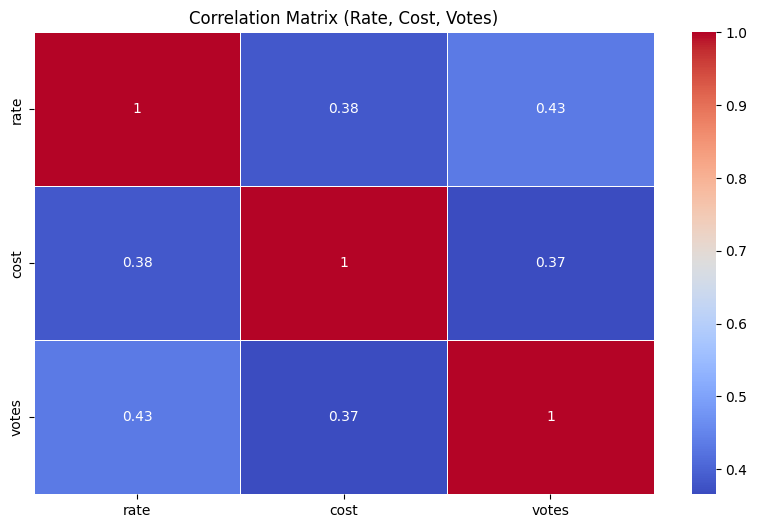

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df[['rate', 'cost', 'votes']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Rate, Cost, Votes)")
plt.show()

Rating vs Cost

A weak positive correlation - Slightly higher prices tend to accompany better ratings, but the link isn't strong. Price alone doesn't guarantee quality.

Rating vs Votes

A moderate positive correlation - More popular restaurants (with more votes/reviews) tend to have slightly higher ratings, suggesting review volume indicates reliability.

Cost vs Votes

A weak positive correlation - Pricier restaurants attract marginally more reviews, possibly due to higher customer expectations or visibility.

## **Feature Engineering**

### **Feature: Primary Cuisine**

**The "cuisines" column has multiple cuisines; we’ll extract the first cuisine as the primary cuisine.**

In [ ]:
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

### **Feature: Price Category**

**We’ll bin the cost variable into labeled categories.**

In [ ]:
bins = [0, 300, 600, 1000, 2000, np.inf]
labels = ['Cheap', 'Affordable', 'Mid-range', 'Expensive', 'Luxury']
df['price_category'] = pd.cut(df['cost'], bins=bins, labels=labels)

In [ ]:
fig = px.histogram(df, x='price_category', color='price_category',
                   title='Distribution of Restaurants by Price Category',
                   category_orders={"price_category": labels})
fig.show()

The price category distribution shows Bangalore's restaurant market is heavily skewed toward budget-friendly options:

Affordable Dominance
The vast majority of restaurants fall into "Cheap" and "Affordable" categories, confirming Bangalore's reputation as a value-driven food market.

Mid-Range Presence
A significant but smaller segment occupies the "Mid-range" tier, serving customers willing to pay slightly more.

Premium Rarity
"Expensive" and "Luxury" categories represent a tiny fraction, suggesting fine dining remains a niche market.

This aligns with earlier findings about cost distribution, showing most dining happens below ₹1000 for two people. The steep drop-off after mid-range indicates clear price sensitivity among Bangalore diners.

### **Feature: Popularity Score**

**Create a popularity score combining votes and rating.**

In [ ]:
df['popularity'] = df['rate'] * np.log1p(df['votes'])

fig = px.scatter(df, x='popularity', y='rate',
                 title='Popularity Score vs Rating',
                 labels={'popularity': 'Popularity Score', 'rate': 'Rating'})
fig.show()

This feature helps identify underrated high-quality places (high rating, low votes) or overhyped places (high votes, low rating).

## **Outlier Detection & Removal**

**Remove Rating Outliers**

In [ ]:
df = df[df['rate'] <= 5.0]
df = df[df['rate'] >= 0]

**Remove Votes Outliers (Top 1%)**

In [ ]:
votes_threshold = df['votes'].quantile(0.99)
df = df[df['votes'] <= votes_threshold]

**Remove Cost Outliers (Top 1%)**

In [ ]:
cost_threshold = df['cost'].quantile(0.99)
df = df[df['cost'] <= cost_threshold]

These extreme values skew visualization and correlation analysis. Removing them helps reveal true trends and structure in the dataset.

**Distribution of Online Ordering**

In [ ]:
fig = px.pie(df, names='online_order', title='Online Ordering Availability')
fig.show()

66.3% of restaurants offer online ordering

33.7% do not

This 2:1 ratio clearly indicates that online food delivery has become standard in Bangalore's dining scene, but a significant one-third still operate without it.

**Distribution of Table Booking**

In [ ]:
fig = px.pie(df, names='book_table', title='Table Booking Availability')
fig.show()

85.8% don't offer reservations

Only 14.2% accept bookings
This extreme imbalance (6:1) suggests most Bangalore eateries operate on first-come, first-served basis, likely due to:

Casual dining culture

Operational simplicity for high-turnover restaurants

Dominance of quick-service formats

The combined data paints Bangalore as a market where convenience (delivery) outweighs formal dining experiences (reservations). This aligns with earlier findings about delivery-dominated restaurant types and price-sensitive consumers.

## **Feature Encoding & Scaling**

**Encoding & Scaling Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_cols = ['cost', 'votes']
categorical_cols = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


**Visualizing the Effect of Scaling**

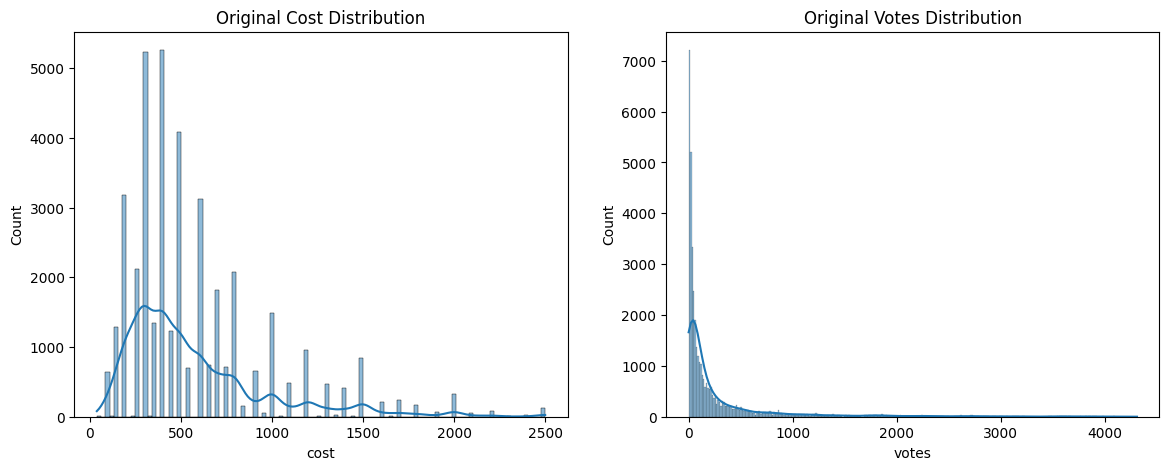

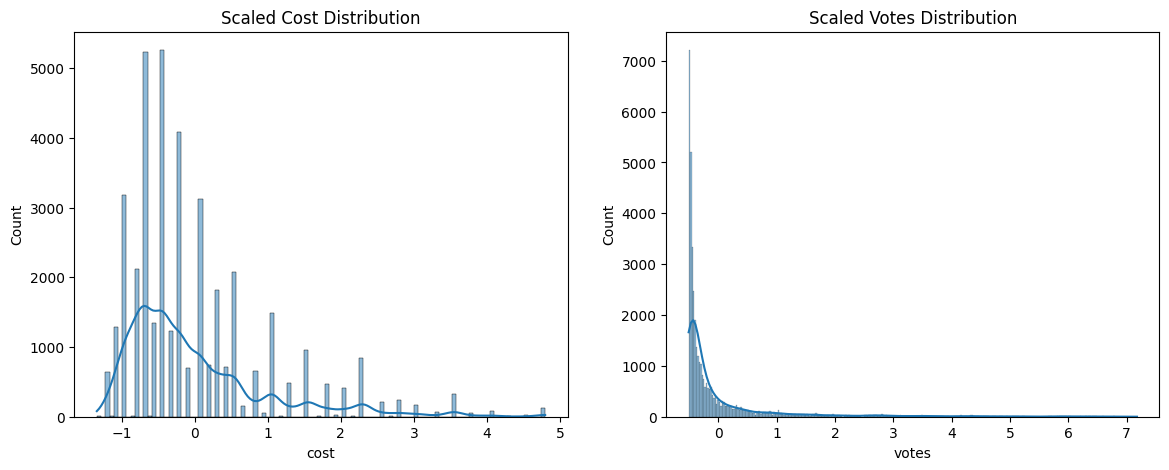

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Original numerical features distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=df, x='cost', kde=True, ax=axes[0])
axes[0].set_title('Original Cost Distribution')
sns.histplot(data=df, x='votes', kde=True, ax=axes[1])
axes[1].set_title('Original Votes Distribution')
plt.show()

# Apply StandardScaler manually for visualization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(scaled_df['cost'], kde=True, ax=axes[0])
axes[0].set_title('Scaled Cost Distribution')
sns.histplot(scaled_df['votes'], kde=True, ax=axes[1])
axes[1].set_title('Scaled Votes Distribution')
plt.show()


## **Model Training and Evaluation**

**Prepare Target and Features**

In [ ]:
X = df.drop(columns=['rate'])
y = df['rate']

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Define Models and Pipelines**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Create Pipelines**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

pipelines = {}

for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

**Train and Evaluate Models**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

results = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    })

**Results DataFrame**

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='RMSE')
results_df

Model      RMSE        R²       MAE
3      Random Forest  0.114960  0.930299  0.049733
2      Decision Tree  0.129532  0.911508  0.033661
1                KNN  0.203334  0.781945  0.115848
4            XGBoost  0.253402  0.661337  0.186951
0  Linear Regression  0.276247  0.597520  0.192129

**Visualization of Model Performance**

In [ ]:
import plotly.express as px

fig = px.bar(results_df, x='Model', y='RMSE', title='Model Comparison: RMSE')
fig.show()

fig_r2 = px.bar(results_df, x='Model', y='R²', title='Model Comparison: R²')
fig_r2.show()

## **Hyperparameter Tuning for the Best Model**

**Define Parameter Grids**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest parameter grid
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}

# XGBoost parameter grid
xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
}

**Setup GridSearch for Each**

In [ ]:
# Random Forest GridSearch
rf_grid = GridSearchCV(
    pipelines['Random Forest'],
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# XGBoost GridSearch
xgb_grid = GridSearchCV(
    pipelines['XGBoost'],
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

**Fit and Find Best Params**

In [ ]:
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
print("Best XGB params:", xgb_grid.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best RF params: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best XGB params: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 10, 'regressor__n_estimators': 200}


**Evaluate Tuned Models on Test Set**

In [ ]:
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

rf_eval = evaluate_model(y_test, y_pred_rf)
xgb_eval = evaluate_model(y_test, y_pred_xgb)

print(f"Random Forest Tuned - RMSE: {rf_eval[0]:.4f}, R²: {rf_eval[1]:.4f}, MAE: {rf_eval[2]:.4f}")
print(f"XGBoost Tuned - RMSE: {xgb_eval[0]:.4f}, R²: {xgb_eval[1]:.4f}, MAE: {xgb_eval[2]:.4f}")


Random Forest Tuned - RMSE: 0.1144, R²: 0.9310, MAE: 0.0493
XGBoost Tuned - RMSE: 0.2126, R²: 0.7616, MAE: 0.1530


## **Residual Analysis of Best Tuned Model**

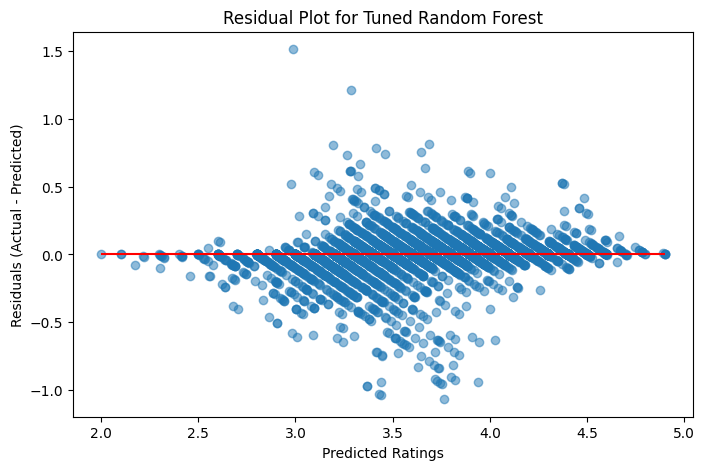

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - rf_best.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(rf_best.predict(X_test), residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(rf_best.predict(X_test)), xmax=max(rf_best.predict(X_test)), colors='r')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Tuned Random Forest')
plt.show()

**Save Model**

In [ ]:
import joblib


joblib.dump(rf_best, 'zomato_rating_predictor_rf.pkl')


['zomato_rating_predictor_rf.pkl']